In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

In [2]:
import qutip
import numpy as np
import naq

# 03: Describing a qubit

## Building quantum states

Let's review our two basis states:

In [3]:
# Our two basis states:
b0 = qutip.basis(2, 0)  # 6s
b1 = qutip.basis(2, 1)  # 7s

When writing these mathematically we write $\left\vert 0 \right\rangle$ and
$\left\vert 1 \right\rangle$.

The states `b0` and `b1` are instances of `Qobj`, which qutip uses to
represent all sorts of quantum objects.

Let's take a closer look at `b0`:

In [4]:
print(b0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


The `Qobj data` is the array that represents our quantum state. As you can
see, it's just a column vector:

$$
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

The `shape` is just the shape of the data -- i.e. `(2, 1)`.

The `type` says this is a `ket` which is the strange word physicists use to
say that it is a quantum state.

The word `dims` is short for dimensions. It describes how the state is built
up from smaller states. Since our state has no smaller states, it currently
looks identical to the shape. We'll look at this again when we add more
atoms later on.

You can also access this informaton using attributes:

In [5]:
print(b0.type)
print(b0.shape)
print(b0.dims)

ket
(2, 1)
[[2], [1]]


If we look at `b1`:

In [6]:
print(b1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


It's just the column vector:

$$
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

If you're familiar with vector spaces, you'll already recognize these two
column vectors as basis vectors, and indeed the space of quantum state will
be a vector space.

The other states that can be built from our two basis states are:

$$
\left\vert \psi \right\rangle = a_0 \left\vert 0 \right\rangle + a_1 \left\vert 1 \right\rangle
$$

where $a_0$ and $b_0$ are any two complex numbers.

These two numbers are called `amplitudes`. For our particular basis they have
the interpretation that if we measure the energy of the state
$\left\vert \psi \right\rangle$ there is a probability $|a_0|^2$ that the
energy measured will be the energy of the state `b0` (i.e. the energy of the
  electron in state `6s`) and a probability $|a_1|^2$ that the energy measured
  will be the energy of the state `b1` (i.e. the energy of the electron in
    state `7s`).

This association of `amplitudes` with probabilities is called "Born's Rule"
and is one of the axioms of quantum mechanics (albeit one which many people
  would like to remove).

Since the probabilities should sum to one, we have the constraint that
$|a_0|^2 + |a_1|^2 = 1$.

The value $|a_0|^2 + |a_1|^2$ is the length of the vector squared, so the
constraint is that the length of the vector describing the state should be 1.

We can construct these in qutip in exactly the way you would expect. Let's
construct some more ourselves:

In [7]:
print(1j * b0)
print(b0 + b1)
print(b0 - b1)
print(b0 - 1j * b1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+1.j]
 [0.+0.j]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 1.]
 [-1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.+0.j]
 [0.-1.j]]


You'll notice that these vectors no longer have length one. In fact they
have length $\sqrt{2}$. This is no good. QuTiP has some functions to help.

The method `.norm()` returns the length:

In [8]:
psi = b0 + b1
print(psi.norm())  # prints the length
print(1 / psi.norm())  # prints the inverse of the length

1.4142135623730951
0.7071067811865475


And the method `.unit()` divides a state by it's length, returning a new
state of length 1:

In [9]:
psi_unit = psi.unit()  # divide a vector by it's length, so that it ends u
print(psi_unit)
print(f"Length: {psi_unit.norm()}")

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Length: 0.9999999999999999


There is also another way that we write the length:

In [10]:
print(f"Length squared: {psi.dag() * psi}")

Length squared: Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[2.]]


Let's look at `b0.dag()` and `(1j * b0).dag()`:

In [11]:
print(b0.dag())
print((1j * b0).dag())

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]
Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0.-1.j 0.+0.j]]


We see that `b0.dag()` is just the transpose of `b0`. It's shape is `(1, 2)`
and the dimensions are also swapped. It's `type` is `bra` which is the
physicist way of saying it is a row vector.

However `(1j * b0).dag()` is a bit different. It's the transpose, but the
imaginary part also has an minus sign in front of it. This is called
the complex conjugate.

So `.dag()` transposes the vector and applies the complex conjugate to each
element. Mathematicians call this the `adjoint`.

In mathematical notation we write $ {\left\vert \psi \right\rangle}^{\dagger} $
as $ \left\langle \psi \right\vert $.

$$
{\left\vert \psi \right\rangle}^{\dagger}
& = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^{\dagger}
& =
& \begin{bmatrix} \alpha^{*} & \beta^{*} \end{bmatrix}
& = \left\langle \psi \right\vert
$$

where $ \alpha^{*} = (a + i b)^{*} = a - i b $.

Now when we multiply the the adjoint of a state by the state itself, we
get an expression called the "inner product" that we can write as:

* in QuTiP: `b0.dag() * b0`
* as vector multiplication: $ \begin{bmatrix} \alpha^{*} & \beta^{*} \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $
* by just multiplying everything out: $ a^* a + b^* b = |a|^2 + |b|^2 $
* how physicists write it: $ \left\langle \psi \vert \psi \right\rangle $

The "inner product" is also called a "bra-ket" (a bracket) because of the way
it is written. The `bra` (the adjoint of a state) is the left part of the
bracket and the `ket` (a state) is the right part. It's a bit silly, but
very useful in practice.

Note that `b0 * b0.dag()` (a `ket-bra`) is something completely different!

In [12]:
ket_bra = b0 * b0.dag()
print(ket_bra)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


It has shape `(2, 2)` and dimensions `[[2], [2]]` and is of type `oper` which
is short for `operator`. As you can see, this one is a two by two matrix --
i.e. it transforms one state into another.

There is one final wrinkle in how the states are structured. In quantum
mechanics, the values we can measure depend on the magnitude of the
amplitudes, i.e. $ \alpha $ and $ \beta $, but only on the *differences*
between phases of the amplitudes.

This means that if two states are related by being multiplied
by $ e^{i \theta} $ for some angle $ \theta $, so that
$ \psi_1 = e^{i \theta} \psi_2 $, then $ \psi_1 $ and $ \psi_2 $ are
indistinguishable states. That is, they are really the same state!

When working with states, QuTiP and physicists both typically ignore this
while doing calculations. They don't try to ensure that the same state
always has the same $ \alpha $ and $ \beta $. Instead they remember that
only the differences of the phases are measurable, and are careful about
checking whether two states are the same.

For example:

In [13]:
b0_phase = np.exp(1j * np.pi / 5) * b0
print(b0_phase)
print(f"Equal: {b0 == b0_phase}")

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.80901699+0.58778525j]
 [0.        +0.j        ]]
Equal: False


So the default equality check treats these as different states. To test
whether two states are the same state, we use the inner product of the
two states, which is only equal to one if the objects represent the
same physical state.

In [14]:
print(b0.dag() * b0_phase)
print(b0.overlap(b0_phase))

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.80901699+0.58778525j]]
(0.8090169943749475+0.5877852522924731j)


The `.overlap()` method calculates the inner product of the two states,
i.e., $ \left\langle \psi_1 \vert \psi_2 \right\rangle $.

There is also a great way to visualize states made from two basis elements
which we will cover next.


## Bloch sphere

We can write any state made from two basis states as:

$$
\left\vert \psi \right\rangle
= \alpha \left\vert 0 \right\rangle + \beta \left\vert 1 \right\rangle
$$

but we still need to introduce the constraint
$ |\alpha|^2 + |\beta|^2 = 1$ and ensure that we used only the
difference in phase between $ \alpha $ and $ \beta $.

We can satisfy the first constraint by recognising it as requiring that
the magnitudes of $ \alpha $ and $ \beta $ lie on a circle and writing
them as the sine and cosine of the angle around the circle:

$$
|\alpha| = sin(\theta / 2) \\
|\beta| = cos(\theta / 2)
$$

Now if we write the difference in phase between $ \alpha $ and $ \beta $
as $e^{i \phi}$, then we can write $ \psi $ as:

$$
\left\vert \psi \right\rangle = cos(\theta / 2) \left\vert \psi \right\rangle
+ e^{i \phi} sin(\theta / 2)
$$

These two angles $ \theta $ and $ \phi $ can be interpreted as spherical the
spherical coordinates of the points of a sphere!

```{figure} ./03-media/bloch-sphere.wikipedia.png
---
name: bloch-sphere-theta-phi
---
How the angles $ \theta $ and $ \phi $ relate to the Bloch sphere.
```

This representation of the space of all states made from two basis elements
is called the Bloch sphere.

We can draw it in QuTiP like so:

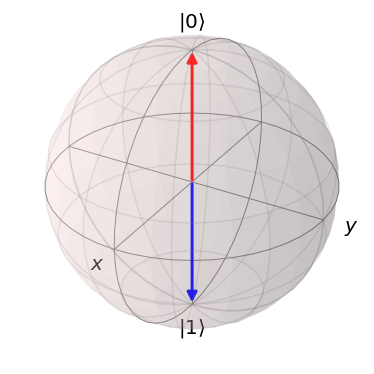

In [15]:
bloch = qutip.Bloch()
bloch.vector_color = ["r", "b"]
bloch.add_states([b0, b1])
bloch.show()

Note that our basis states `b0` and `b1` are the poles of the sphere,
which might be a bit unexpected since `b0.dag() * b1` is `0`. If we
were to consider the two vectors in 3D space, then `b0.dag() * b1` would
equal `-1`.

Let's check that if we change the overall phase of a state, it doesn't
change where the state appears on the Bloch sphere:

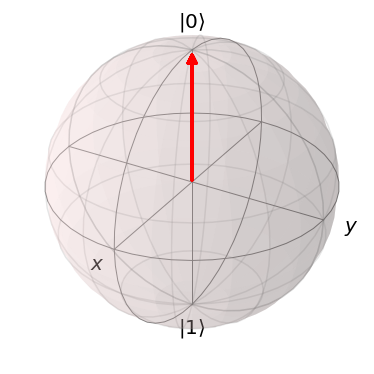

In [16]:
thetas = np.linspace(0, 2 * np.pi, 16)
states = [np.exp(1j * theta) * b0 for theta in thetas]

bloch = qutip.Bloch()
bloch.vector_color = ["r"]
bloch.add_states(states)
bloch.show()

But if we change the relative phase, then the states are different:

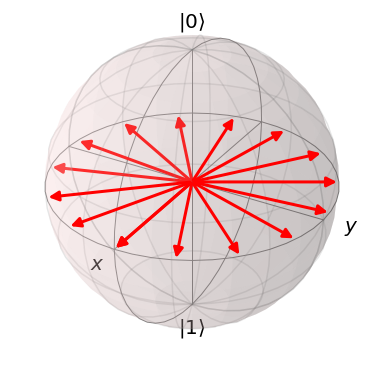

In [17]:
thetas = np.linspace(0, 2 * np.pi, 16)
states = [
  (np.exp(1j * theta) * b0 + b1).unit()
  for theta in thetas
]

bloch = qutip.Bloch()
bloch.vector_color = ["r"]
bloch.add_states(states)
bloch.show()